<a href="https://colab.research.google.com/github/Gaurav2912/Customer-Segmentation-/blob/main/Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [30]:
# set default gridtype, fontsize and palette
sns.set_style("whitegrid")
sns.set_palette(palette = ['#4169E1', '#FF5F15', '#4CBB17'])
plt.rcParams['font.size'] = 14

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/capstone project/Customer Segmentation/'
# df= pd.read_excel(path + 'Online Retail.xlsx')
df= pd.read_csv(path + 'Online Retail.csv')  # pandas can read csv file faster compare to xlsx file 

In [4]:
#checking top 5 rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
#checking bottom 5 rows of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [6]:
#checking shape of dataset
df.shape

(541909, 8)

* dataframe have 8 rows and 541909 columns

In [7]:
# basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# checking for unique values
df.nunique().sort_values()

Country           38
Quantity         722
UnitPrice       1630
StockCode       4070
Description     4223
CustomerID      4372
InvoiceDate    23260
InvoiceNo      25900
dtype: int64

## **Data Cleaning**

In [9]:
# Checking for duplicate values
df.duplicated().sum()

5268

In [10]:
# dropping duplicate values
df = df.drop_duplicates()

In [11]:
# Checking for duplicate values
df.duplicated().sum()

0

**Checking for null values**

In [12]:
# checking for null values in dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [13]:
# checking for null values in dataset in terms of percentage
100 * df.isnull().sum() / len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

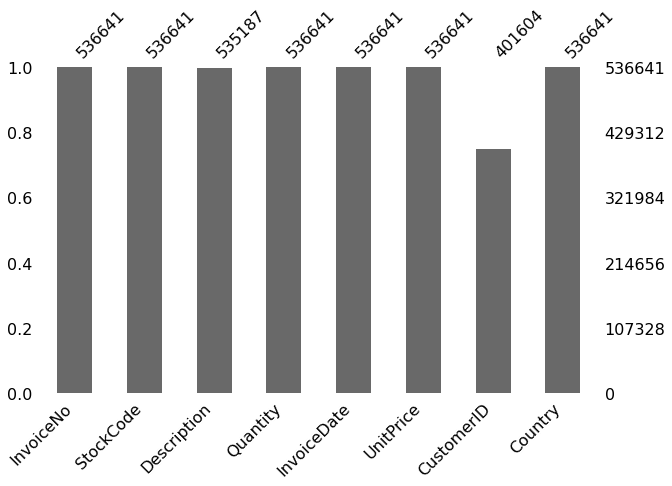

In [14]:
# Visualize the number of missing
# values as a bar chart
plt.figure()
msno.bar(df, figsize= (10,6));

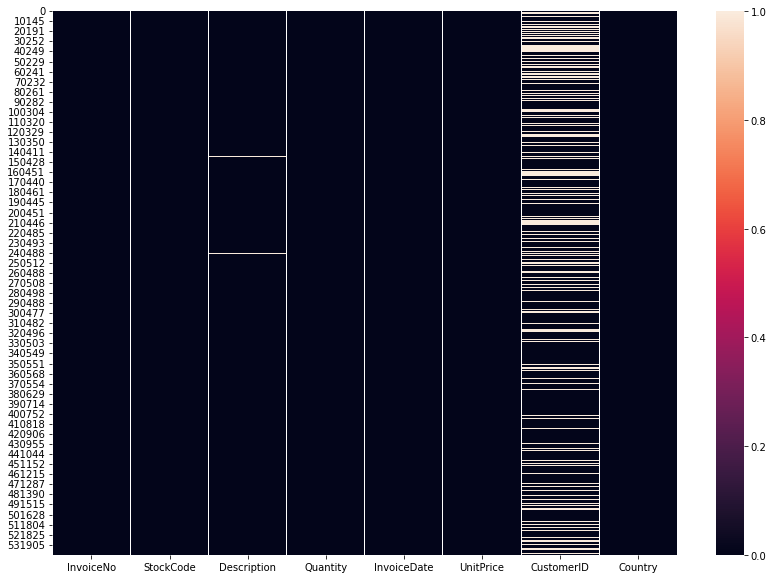

In [15]:
# Visualize missing values as a matrix
plt.figure(figsize= (14,10))
sns.heatmap(df.isnull());

* As we can see that almost 25 percent of the data in Customer ID are missing and Description have only 0.26 percent of missing data.
* If the customer id would be unique for each observation, I would have removed it but it has 4372 unique values, out of 406829 non-null observations, it seems to be the important feature for clustering, so I am keeping this column. 
* But for making customer segmenttation these null values should be removed.

In [16]:
# dropping all  null values
df.dropna(inplace=True)   

In [17]:
#checking for missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

All missing values are gone.

---
Statistical summary 

In [18]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [19]:
old_num_rows = 541909
new_num_rows = 392692    # df.shape[0]

percent_removal = 100 * (old_num_rows - new_num_rows) / old_num_rows
print(f"After data cleaning {round(percent_removal, 2)} % of rows in dataframe are gone") 

After data cleaning 27.54 % of rows in dataframe are gone


In [20]:
# statistical summary of non numerical features dataframe
df.describe(include= np.object)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,401604,401604,401604,401604,401604
unique,22190,3684,3896,20460,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,11/14/11 15:27,United Kingdom
freq,542,2065,2058,543,356728


In [21]:
# statistical summary of numeric features in dataframe
df.describe(percentiles = [.1, .25, .5, .75, .9])

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
10%,1.000000,0.550000,12867.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
90%,24.000000,6.750000,17716.000000
max,80995.000000,38970.000000,18287.000000


* The maximum values in the Quantity and Unit price columns are far from the general trend.
* The minimum value of these feature should be zero, can not be negative.

Let's explore negative values

In [22]:
df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


* It seems that these negative values correspond to a canceled transaction.

I am selecting only positive values for Quantity and non negative values for UnitPrice

In [23]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] >= 0)]

In [24]:
# Let's check all canceled transactions
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


All canceled transactions are also gone.

In [25]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# Feature Engineering

Extract part of date

* Year
* Month
* Day
* Weekday
* Hour


In [26]:
# Convert it to datetime object
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'])

In [27]:
def add_dateparts(df, col):
  """
  Extract and create year, month, Day, Weekday and Hour
  """

  df['Year'] = df[col].dt.year             # Extract and create year 
  df['MonthNum'] = df[col].dt.month       # Extract and create month in numerical format
  df['Month'] = df[col].dt.month_name()    # Extract and create month
  df['Day'] = df[col].dt.day               # Extract and create day in numerical fromat 
  df['Day'] = df[col].dt.day_name()        # Extract and create day 
  df['WeekdayNum'] = df[col].dt.weekday   # Extract and create weekday
  df['Hour'] = df[col].dt.hour             # Extract and create hour


# Run the function with "InvoiceDate" columns
add_dateparts(df, 'InvoiceDate')

In [28]:
# New column for Total Price which is product of Quantity and UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,MonthNum,Month,Day,WeekdayNum,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,Wednesday,2,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,Wednesday,2,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,Wednesday,2,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,Wednesday,2,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,Wednesday,2,8,20.34


# EDA
-----
It is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 
____
let's do some exploration and visulization for different - different  data.

In [31]:
# define some functions

def percentage_calulator(series_name):
  """Calculate and return percentage value per item in given series."""

  return 100 * series_name / series_name.sum()


def top_nbar(series_name, title_str, palette= None, n= 10, figsize_tup= (12,7)):
  """
  Plot bar graph for top n product in given series.
  """
 
  plt.figure(figsize= figsize_tup)
  
  item_names = series_name[:n].index     # grab the index
  item_values = series_name[:n].values   # grab the values 

  # barplot
  sns.barplot(x= item_values, y= item_names, 
            palette= palette).set_title(title_str)

  # calulate percentage
  percent_item = percentage_calulator(series_name)


  # To write text on each bar of the bar plot
  for i in range(n):
    # x is position of text on x-axis, s is value that have to write on plot
    # percent values
    plt.text(y= i + 0.2,x = series_name.values[i], s= str(round(percent_item[i],2)) + " %", 
             fontsize=15, color='black')
    
    # actual value
    plt.text(y= i + 0.1, x = series_name.values[0] / 10, s= series_name.values[i],   
             fontsize=15, color='white')

**Bar plot**
* Products with its Frequency
* Products with number of items sold
* Products with TotalPrice
* Most expencive Products.  

----
**Products with its Frequency**

In [32]:
prod_freq = df['Description'].value_counts()
prod_freq.head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64

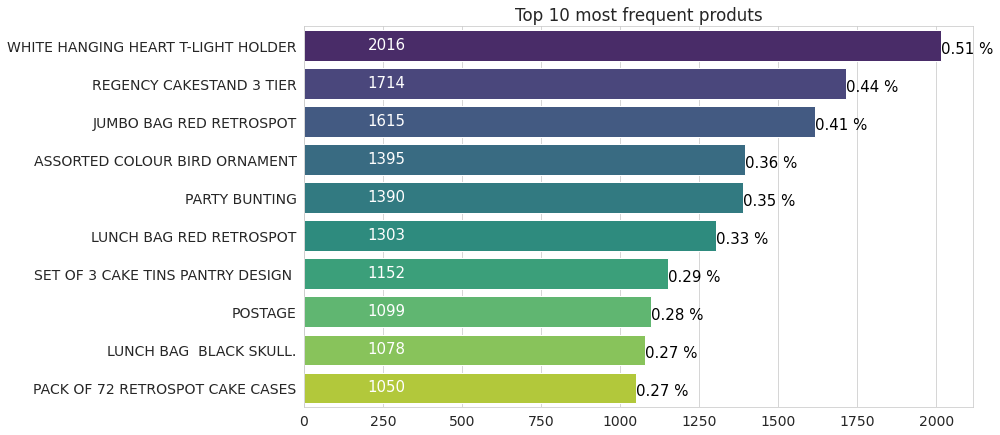

In [33]:
# Top 10 most frequent produts, white text is actual value and black text for percentage
top_nbar(prod_freq, "Top 10 most frequent produts", 'viridis')

In [34]:
# least popular products with minimum values
prod_freq[prod_freq == min(prod_freq)]

BEADED LOVE HEART JEWELLERY SET        1
ANTIQUE RASPBERRY FLOWER EARRINGS      1
FIRE POLISHED GLASS BRACELET MONTAN    1
FLOWER GLASS GARLD NECKL36"TURQUOIS    1
BIG POLKADOT MUG                       1
                                      ..
GREEN WITH METAL BAG CHARM             1
WHITE WITH METAL BAG CHARM             1
BLUE/NAT SHELL NECKLACE W PENDANT      1
PINK EASTER HENS+FLOWER                1
PAPER CRAFT , LITTLE BIRDIE            1
Name: Description, Length: 213, dtype: int64

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

<br/>

>Top 10 popular products are
- WHITE HANGING HEART T-LIGHT HOLDER   
- JUMBO BAG RED RETROSPOT              
- REGENCY CAKESTAND 3 TIER             
- PARTY BUNTING                        
- LUNCH BAG RED RETROSPOT              
- ASSORTED COLOUR BIRD ORNAMENT        
- SET OF 3 CAKE TINS PANTRY DESIGN     
- PACK OF 72 RETROSPOT CAKE CASES      
- LUNCH BAG  BLACK SKULL.              
- NATURAL SLATE HEART CHALKBOARD

213 products that are least popular, sold only once.

---
**Products with number of items sold**

In [35]:
prod_sold = df.groupby('Description')['Quantity'].sum().sort_values(ascending= False)
prod_sold.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

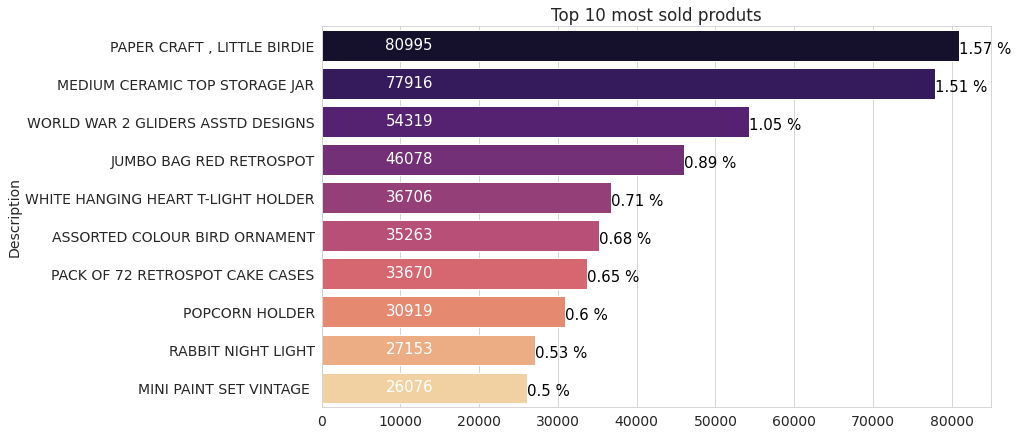

In [36]:
# checking for unique values
top_nbar(prod_sold, "Top 10 most sold produts", 'magma')

In [41]:
# least sold products are
prod_sold[prod_sold == min(prod_sold)].head()

Description
FUNKY MONKEY MUG                    1
SET 36 COLOURING PENCILS DOILEY     1
SET/3 FLORAL GARDEN TOOLS IN BAG    1
PINK CRYSTAL GUITAR PHONE CHARM     1
BLUE PADDED SOFT MOBILE             1
Name: Quantity, dtype: int64

In [42]:
# total number of least sold products 
len(prod_sold[prod_sold == min(prod_sold)])

59

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

<br/>

>Top 10 most sold produts
- PAPER CRAFT , LITTLE BIRDIE       
- MEDIUM CERAMIC TOP STORAGE JAR    
- WORLD WAR 2 GLIDERS ASSTD DESIGNS 
- JUMBO BAG RED RETROSPOT           
- WHITE HANGING HEART T-LIGHT HOLDER
- ASSORTED COLOUR BIRD ORNAMENT     
- PACK OF 72 RETROSPOT CAKE CASES   
- POPCORN HOLDER                    
- RABBIT NIGHT LIGHT                
- MINI PAINT SET VINTAGE            

59 products that are the least popular and only one item is sold.

---
**Products with TotalPrice**

In [47]:
prod_total_price = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending= False)
prod_total_price = round(prod_total_price,2)                    # round upto two decimal places
prod_total_price.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalPrice, dtype: float64

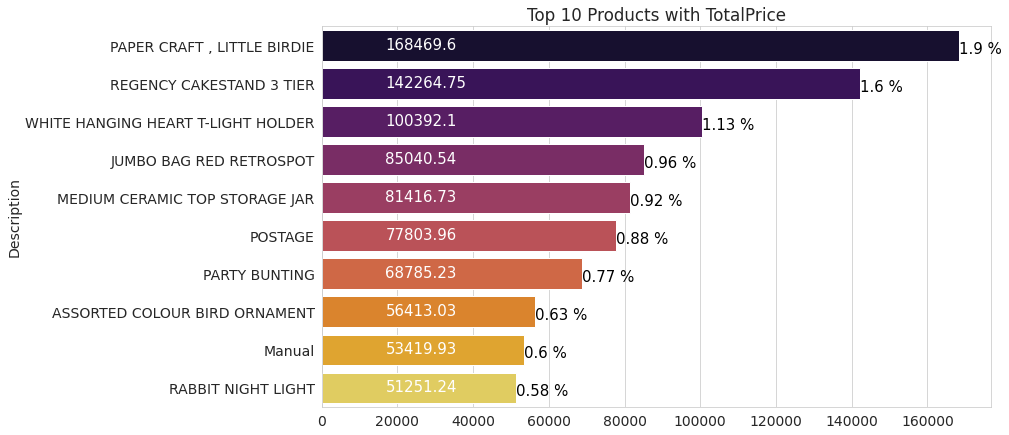

In [49]:
# checking for unique values
top_nbar(prod_total_price, "Top 10 Products with TotalPrice", 'inferno')

In [52]:
# bottom 10 products with with TotalPrice
prod_total_price.tail(10)

Description
PACK 4 FLOWER/BUTTERFLY PATCHES        1.25
60 GOLD AND SILVER FAIRY CAKE CASES    1.10
HAPPY BIRTHDAY CARD TEDDY/CAKE         0.95
CAT WITH SUNGLASSES BLANK CARD         0.95
PINK CRYSTAL GUITAR PHONE CHARM        0.85
PURPLE FRANGIPANI HAIRCLIP             0.85
VINTAGE BLUE TINSEL REEL               0.84
SET 12 COLOURING PENCILS DOILEY        0.65
HEN HOUSE W CHICK IN NEST              0.42
PADS TO MATCH ALL CUSHIONS             0.00
Name: TotalPrice, dtype: float64

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

<br/>

>Top 10 Products with TotalPrice
- PAPER CRAFT , LITTLE BIRDIE       
- REGENCY CAKESTAND 3 TIER          
- WHITE HANGING HEART T-LIGHT HOLDER
- JUMBO BAG RED RETROSPOT           
- MEDIUM CERAMIC TOP STORAGE JAR    
- POSTAGE                           
- PARTY BUNTING                     
- ASSORTED COLOUR BIRD ORNAMENT     
- Manual                            
- RABBIT NIGHT LIGHT                

>Bottom 10 products with with TotalPrice
- PACK 4 FLOWER/BUTTERFLY PATCHES    
- 60 GOLD AND SILVER FAIRY CAKE CASES
- HAPPY BIRTHDAY CARD TEDDY/CAKE     
- CAT WITH SUNGLASSES BLANK CARD     
- PINK CRYSTAL GUITAR PHONE CHARM    
- PURPLE FRANGIPANI HAIRCLIP         
- VINTAGE BLUE TINSEL REEL           
- SET 12 COLOURING PENCILS DOILEY    
- HEN HOUSE W CHICK IN NEST          
- PADS TO MATCH ALL CUSHIONS         



,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,MonthNum,Month,Day,WeekdayNum,Hour,TotalPrice
Description,,,,,,,,,,,,,,
WHITE HANGING HEART T-LIGHT HOLDER,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,Wednesday,2,8,15.30
WHITE METAL LANTERN,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,Wednesday,2,8,20.34
CREAM CUPID HEARTS COAT HANGER,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,Wednesday,2,8,22.00
KNITTED UNION FLAG HOT WATER BOTTLE,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,Wednesday,2,8,20.34
RED WOOLLY HOTTIE WHITE HEART.,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,Wednesday,2,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PACK OF 20 SPACEBOY NAPKINS,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,December,Friday,4,12,10.20
CHILDREN'S APRON DOLLY GIRL,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,December,Friday,4,12,12.60
CHILDRENS CUTLERY DOLLY GIRL,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,December,Friday,4,12,16.60


In [53]:
# checking for unique values
df.nunique().sort_values()

Year               2
Day                6
WeekdayNum         6
MonthNum          12
Month             12
Hour              15
Country           37
Quantity         302
UnitPrice        441
TotalPrice      2940
StockCode       3665
Description     3877
CustomerID      4339
InvoiceDate    17286
InvoiceNo      18536
dtype: int64